In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#plt.rcParams['figure.figsize'] = (20,8)
#plt.rcParams['figure.dpi'] = 650
%matplotlib inline
from sklearn.cluster import KMeans
import warnings

In [2]:
#import matplotlib.pyplot as plt

#fig, ax = plt.subplots(figsize=(12, 8))
# Your plotting code here
#plt.show()

In [3]:
#fig, axes = plt.subplots(10, 24, figsize=(24, 10))  # 10 rows, 24 columns for 240 subplots
# Loop through axes and plot on each
#plt.show()


In [4]:
df = pd.read_csv("wine.csv")

In [5]:
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

## Task 1: Exploratory Data Analysis (EDA):

<Axes: >

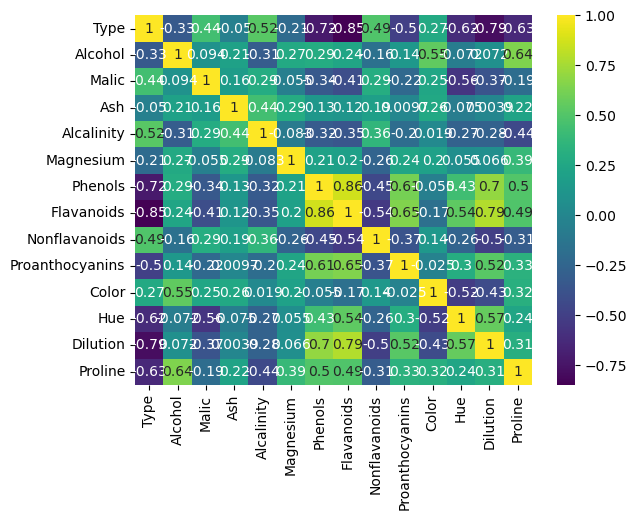

In [6]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')

In [7]:
df.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [8]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

<Axes: >

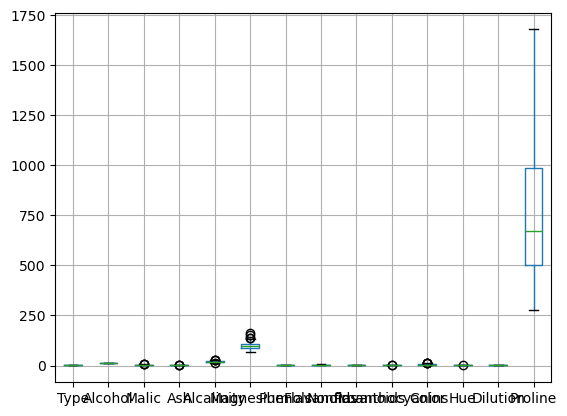

In [9]:
df.boxplot()

In [10]:
df.duplicated().sum()

0

<Axes: >

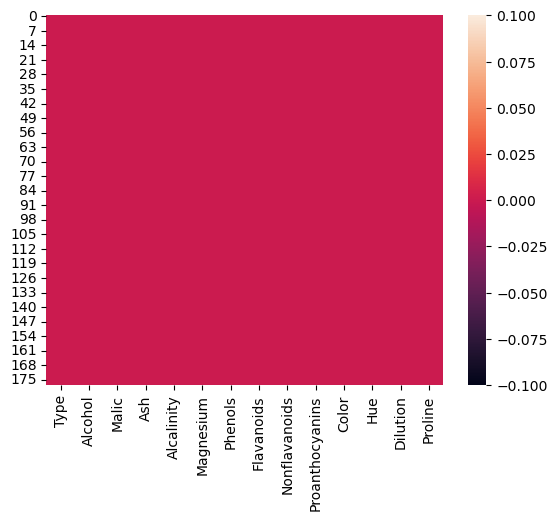

In [11]:
sns.heatmap(df.isna())

In [12]:
# missing value
for i in df.isna().sum():
  print((i/len(df))*100)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


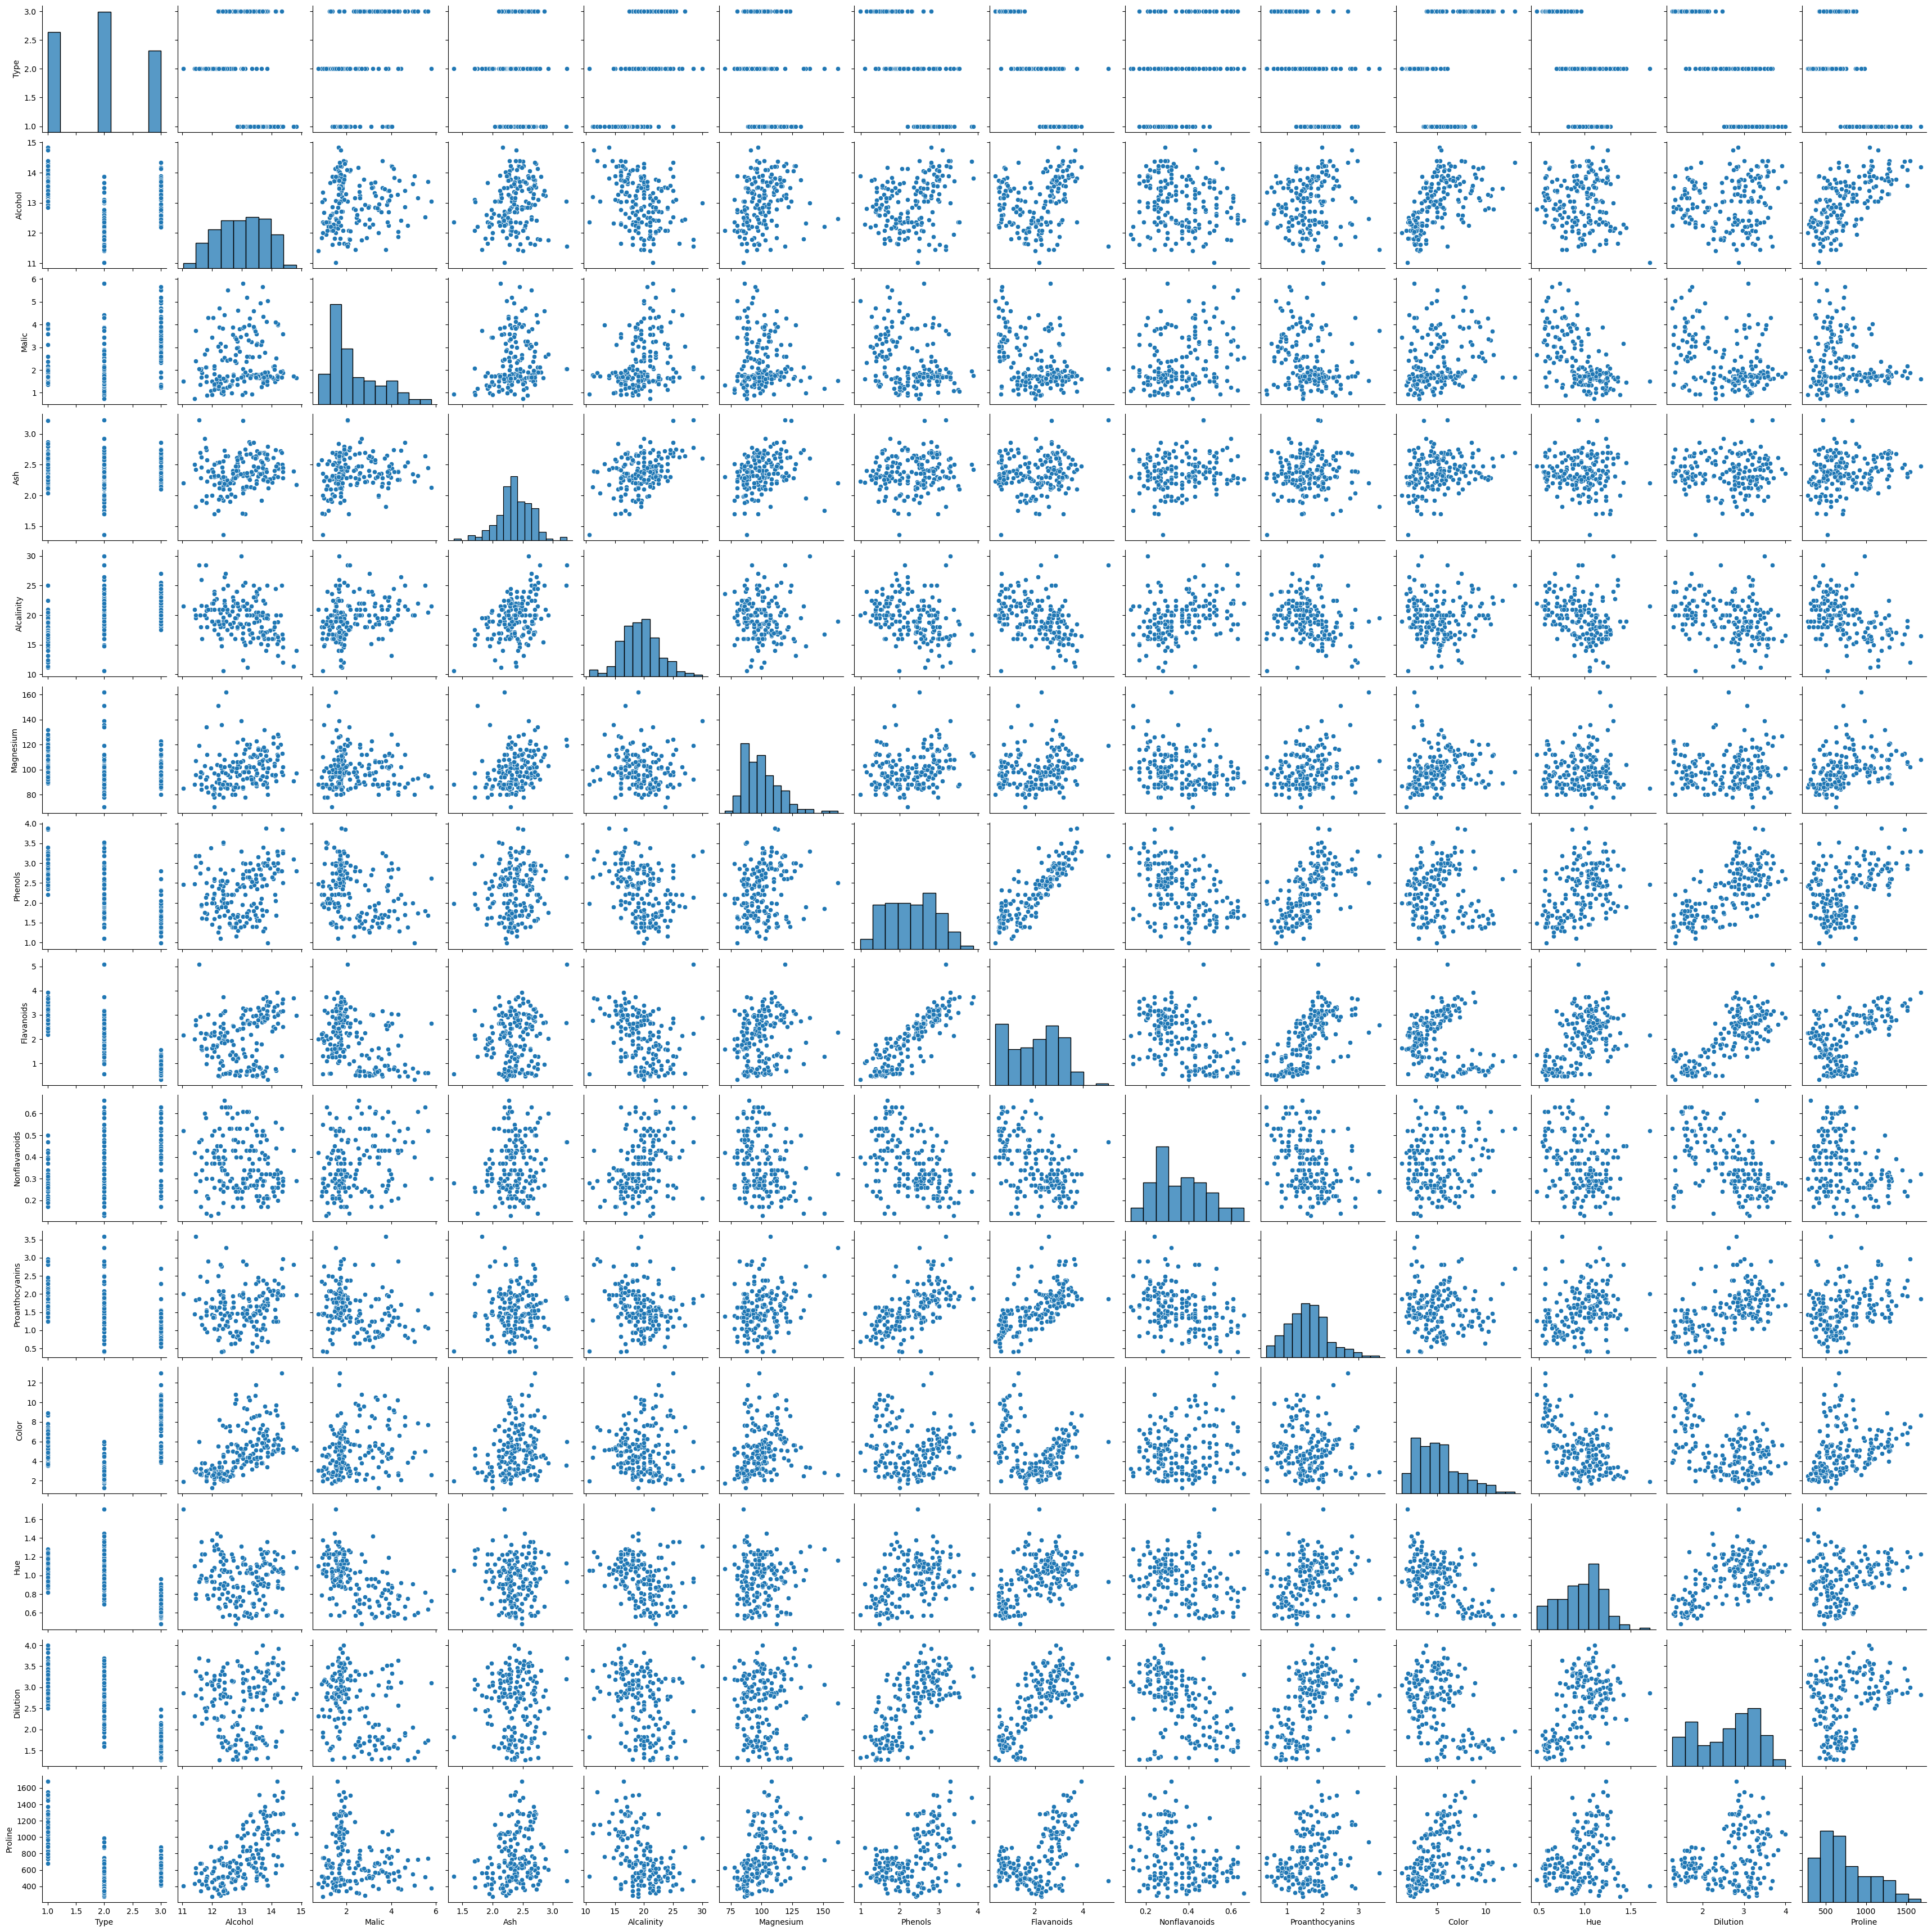

In [13]:
sns.pairplot(df)

In [14]:
df.corr(numeric_only=True)

Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Proline         -0.633717  0.643720 -0.192011  0.223626   -0.440597   

                 Magnesium   Phenols  Flavanoids  Nonflavanoids  \
Type             -0.209179 -0.719163   -0.847498       0.489109   
Alcohol           0.270798  0.289101    0.236815      -0.155929   
Malic            -0.054575 -0.335167   -0.411007       0.292977   
Ash               0.286587  0.128980    0.115077       0.186230   
Alcalinity       -0.083333 -0.321113   -0.351370       0.361922   
Magnesium         1.000000  0.214401    0.195784      -0.256294   
Phenols           0.214401  1.000000    0.864564      -0.449935   
Flavanoids        0.195784  0.864564    1.000000      -0.537900   
Nonflavanoids    -0.256294 -0.449935   -0.537900       1.000000   
Proanthocyanins   0.236441  0.612413    0.652692      -0.365845   
Color             0.199950 -0.055136   -0.172379       0.139057   
Hue               0.055398  0.433681    0.543479      -0.262640   
Dilution          0.066004  0.699949    0.787194      -0.503270   
Proline           0.393351  0.498115    0.494193      -0.311385   

                 Proanthocyanins     Color       Hue  Dilution   Proline  
Type                   -0.499130  0.265668 -0.617369 -0.788230 -0.633717  
Alcohol                 0.136698  0.546364 -0.071747  0.072343  0.643720  
Malic                  -0.220746  0.248985 -0.561296 -0.368710 -0.192011  
Ash                     0.009652  0.258887 -0.074667  0.003911  0.223626  
Alcalinity             -0.197327  0.018732 -0.273955 -0.276769 -0.440597  
Magnesium               0.236441  0.199950  0.055398  0.066004  0.393351  
Phenols                 0.612413 -0.055136  0.433681  0.699949  0.498115  
Flavanoids              0.652692 -0.172379  0.543479  0.787194  0.494193  
Nonflavanoids          -0.365845  0.139057 -0.262640 -0.503270 -0.311385  
Proanthocyanins         1.000000 -0.025250  0.295544  0.519067  0.330417  
Color                  -0.025250  1.000000 -0.521813 -0.428815  0.316100  
Hue                     0.295544 -0.521813  1.000000  0.565468  0.236183  
Dilution                0.519067 -0.428815  0.565468  1.000000  0.312761  
Proline                 0.330417  0.316100  0.236183  0.312761  1.000000

In [15]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

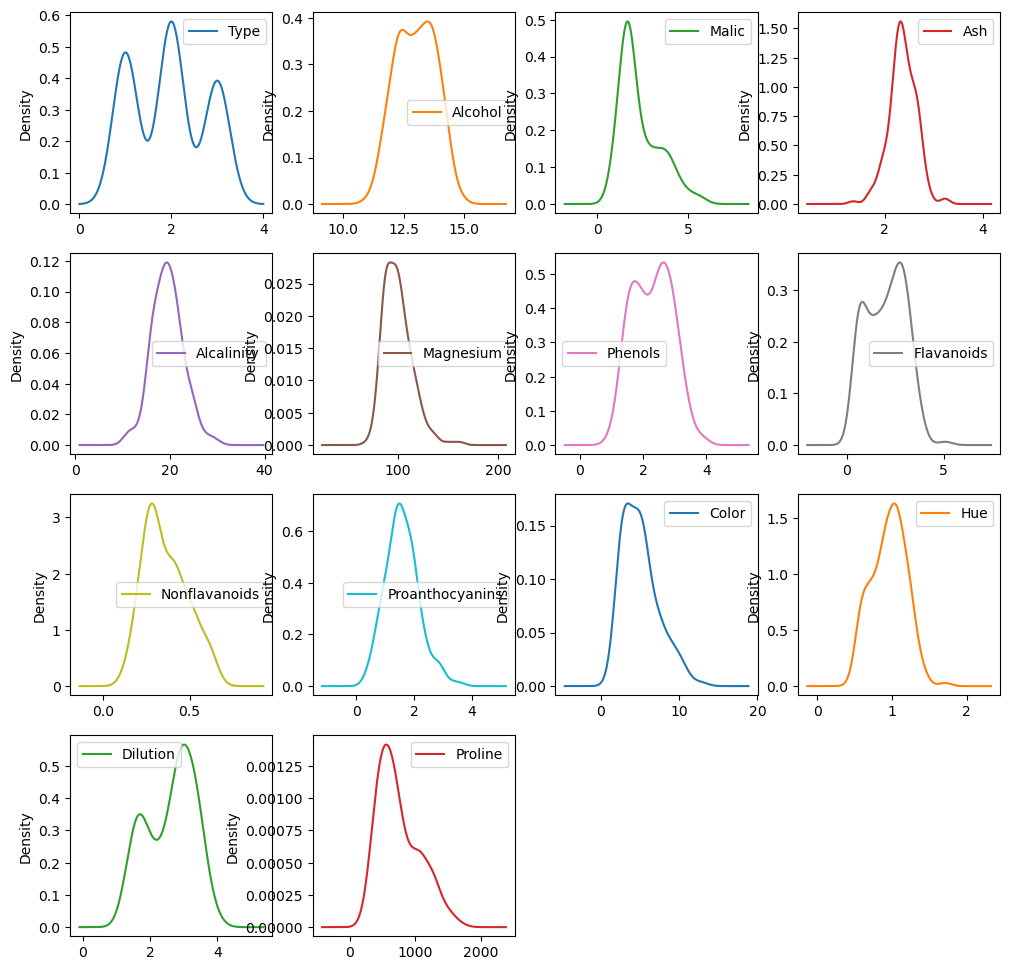

In [16]:
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(12, 12))
plt.show()

In [17]:
def outlier_detection(data,colname):
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme,q1,q3

<Axes: >

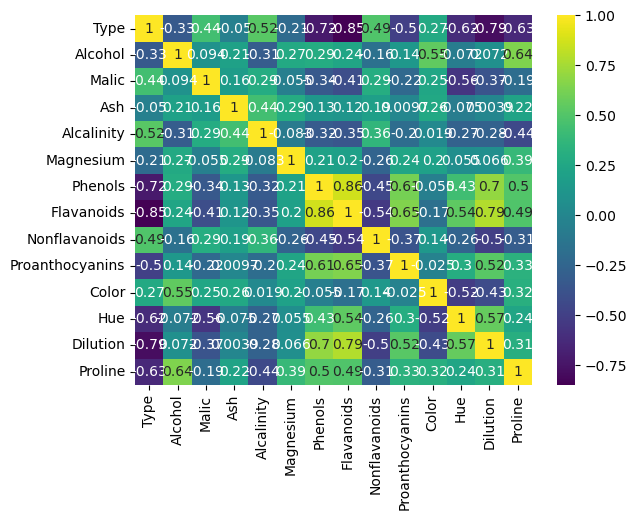

In [18]:
sns.heatmap(df.corr(numeric_only=False),annot=True,cmap='viridis')

## Task 2: Dimensionality Reduction with PCA:

In [19]:
df1 = StandardScaler()
std_normal = df1.fit_transform(df)

In [20]:
std_normal

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [21]:
pca = PCA()
pca_comp = pca.fit_transform(df)

In [22]:
pca_comp

array([[ 3.18564055e+02,  2.14907729e+01,  3.16461306e+00, ...,
         1.68878924e-01, -1.64297340e-02,  8.93553535e-02],
       [ 3.03098514e+02, -5.36608268e+00,  6.81699246e+00, ...,
         8.89334239e-02, -4.48448723e-02,  1.78962892e-02],
       [ 4.38062063e+02, -6.53798613e+00, -1.06671672e+00, ...,
         1.80875713e-01, -5.03578282e-02, -3.94205943e-02],
       ...,
       [ 8.84563102e+01,  1.87796442e+01, -2.42312742e+00, ...,
        -2.09746486e-01,  8.53365516e-02,  3.43716469e-02],
       [ 9.34544723e+01,  1.86741801e+01, -1.95877509e+00, ...,
        -3.22197611e-04, -4.65644908e-02,  1.36469328e-01],
       [-1.86944619e+02, -2.11062888e-01, -5.73392038e+00, ...,
         3.92954136e-02,  1.60191386e-02,  1.97873108e-02]])

In [23]:
pca.explained_variance_

array([9.92020307e+04, 1.72536596e+02, 9.53119601e+00, 5.10080996e+00,
       1.28578826e+00, 8.68166571e-01, 2.87006972e-01, 1.55278963e-01,
       1.13733317e-01, 8.63784262e-02, 4.62026188e-02, 3.49273038e-02,
       2.07626732e-02, 8.09265892e-03])

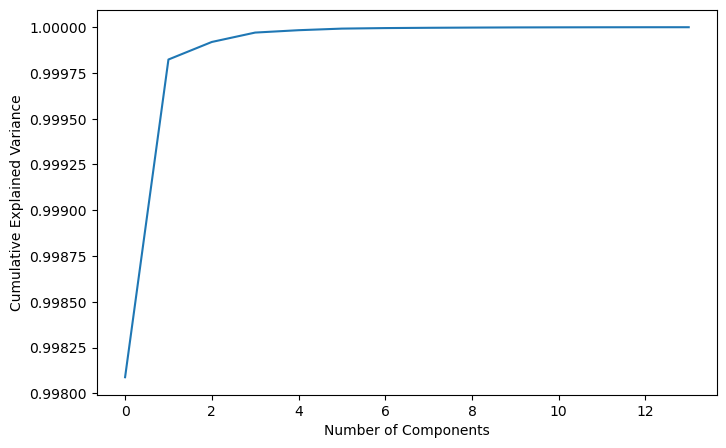

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [25]:
var = pca.explained_variance_ratio_
var

array([9.98087625e-01, 1.73591851e-03, 9.58948998e-05, 5.13200714e-05,
       1.29365230e-05, 8.73476385e-06, 2.88762342e-06, 1.56228669e-06,
       1.14428924e-06, 8.69067273e-07, 4.64851997e-07, 3.51409235e-07,
       2.08896603e-07, 8.14215462e-08])

In [26]:
var1=np.cumsum(np.round(var,decimals=3)*100) 

In [27]:
var1

array([ 99.8, 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. ])

In [28]:
pca.components_

array([[-1.55934284e-03,  1.65926191e-03, -6.81019030e-04,
         1.94905197e-04, -4.67130461e-03,  1.78679787e-02,
         9.89831553e-04,  1.56729290e-03, -1.23086954e-04,
         6.00609082e-04,  2.32712720e-03,  1.71381131e-04,
         7.04935892e-04,  9.99821721e-01],
       [ 2.77861762e-03,  1.20426744e-03,  2.15953126e-03,
         4.59399561e-03,  2.64607000e-02,  9.99339902e-01,
         8.74730944e-04, -5.86582556e-05, -1.35399415e-03,
         5.00222716e-03,  1.51142222e-02, -7.64042527e-04,
        -3.50068415e-03, -1.77693551e-02],
       [-1.00919962e-01, -1.83035443e-02, -1.24559463e-01,
        -5.12928854e-02, -9.28099861e-01,  2.99845440e-02,
         4.27611042e-02,  9.02671155e-02, -1.37215147e-02,
         2.62371281e-02, -3.03202978e-01,  2.69922728e-02,
         7.43661999e-02, -4.62655971e-03],
       [-1.47645845e-01, -1.36988601e-01, -1.56739376e-01,
         1.20471220e-02,  3.56990103e-01,  4.75411673e-03,
         7.64520642e-02,  1.72191025e-01, -1.

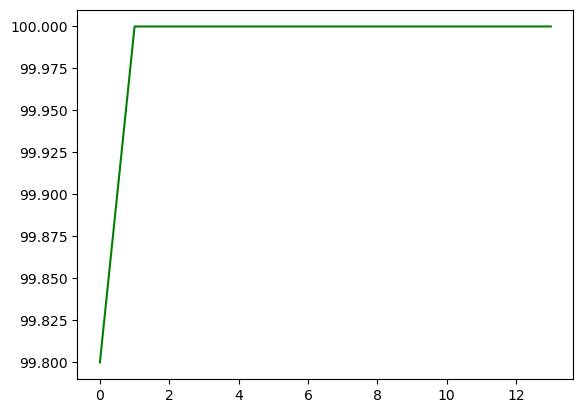

In [29]:
plt.plot(var1,color = "green")

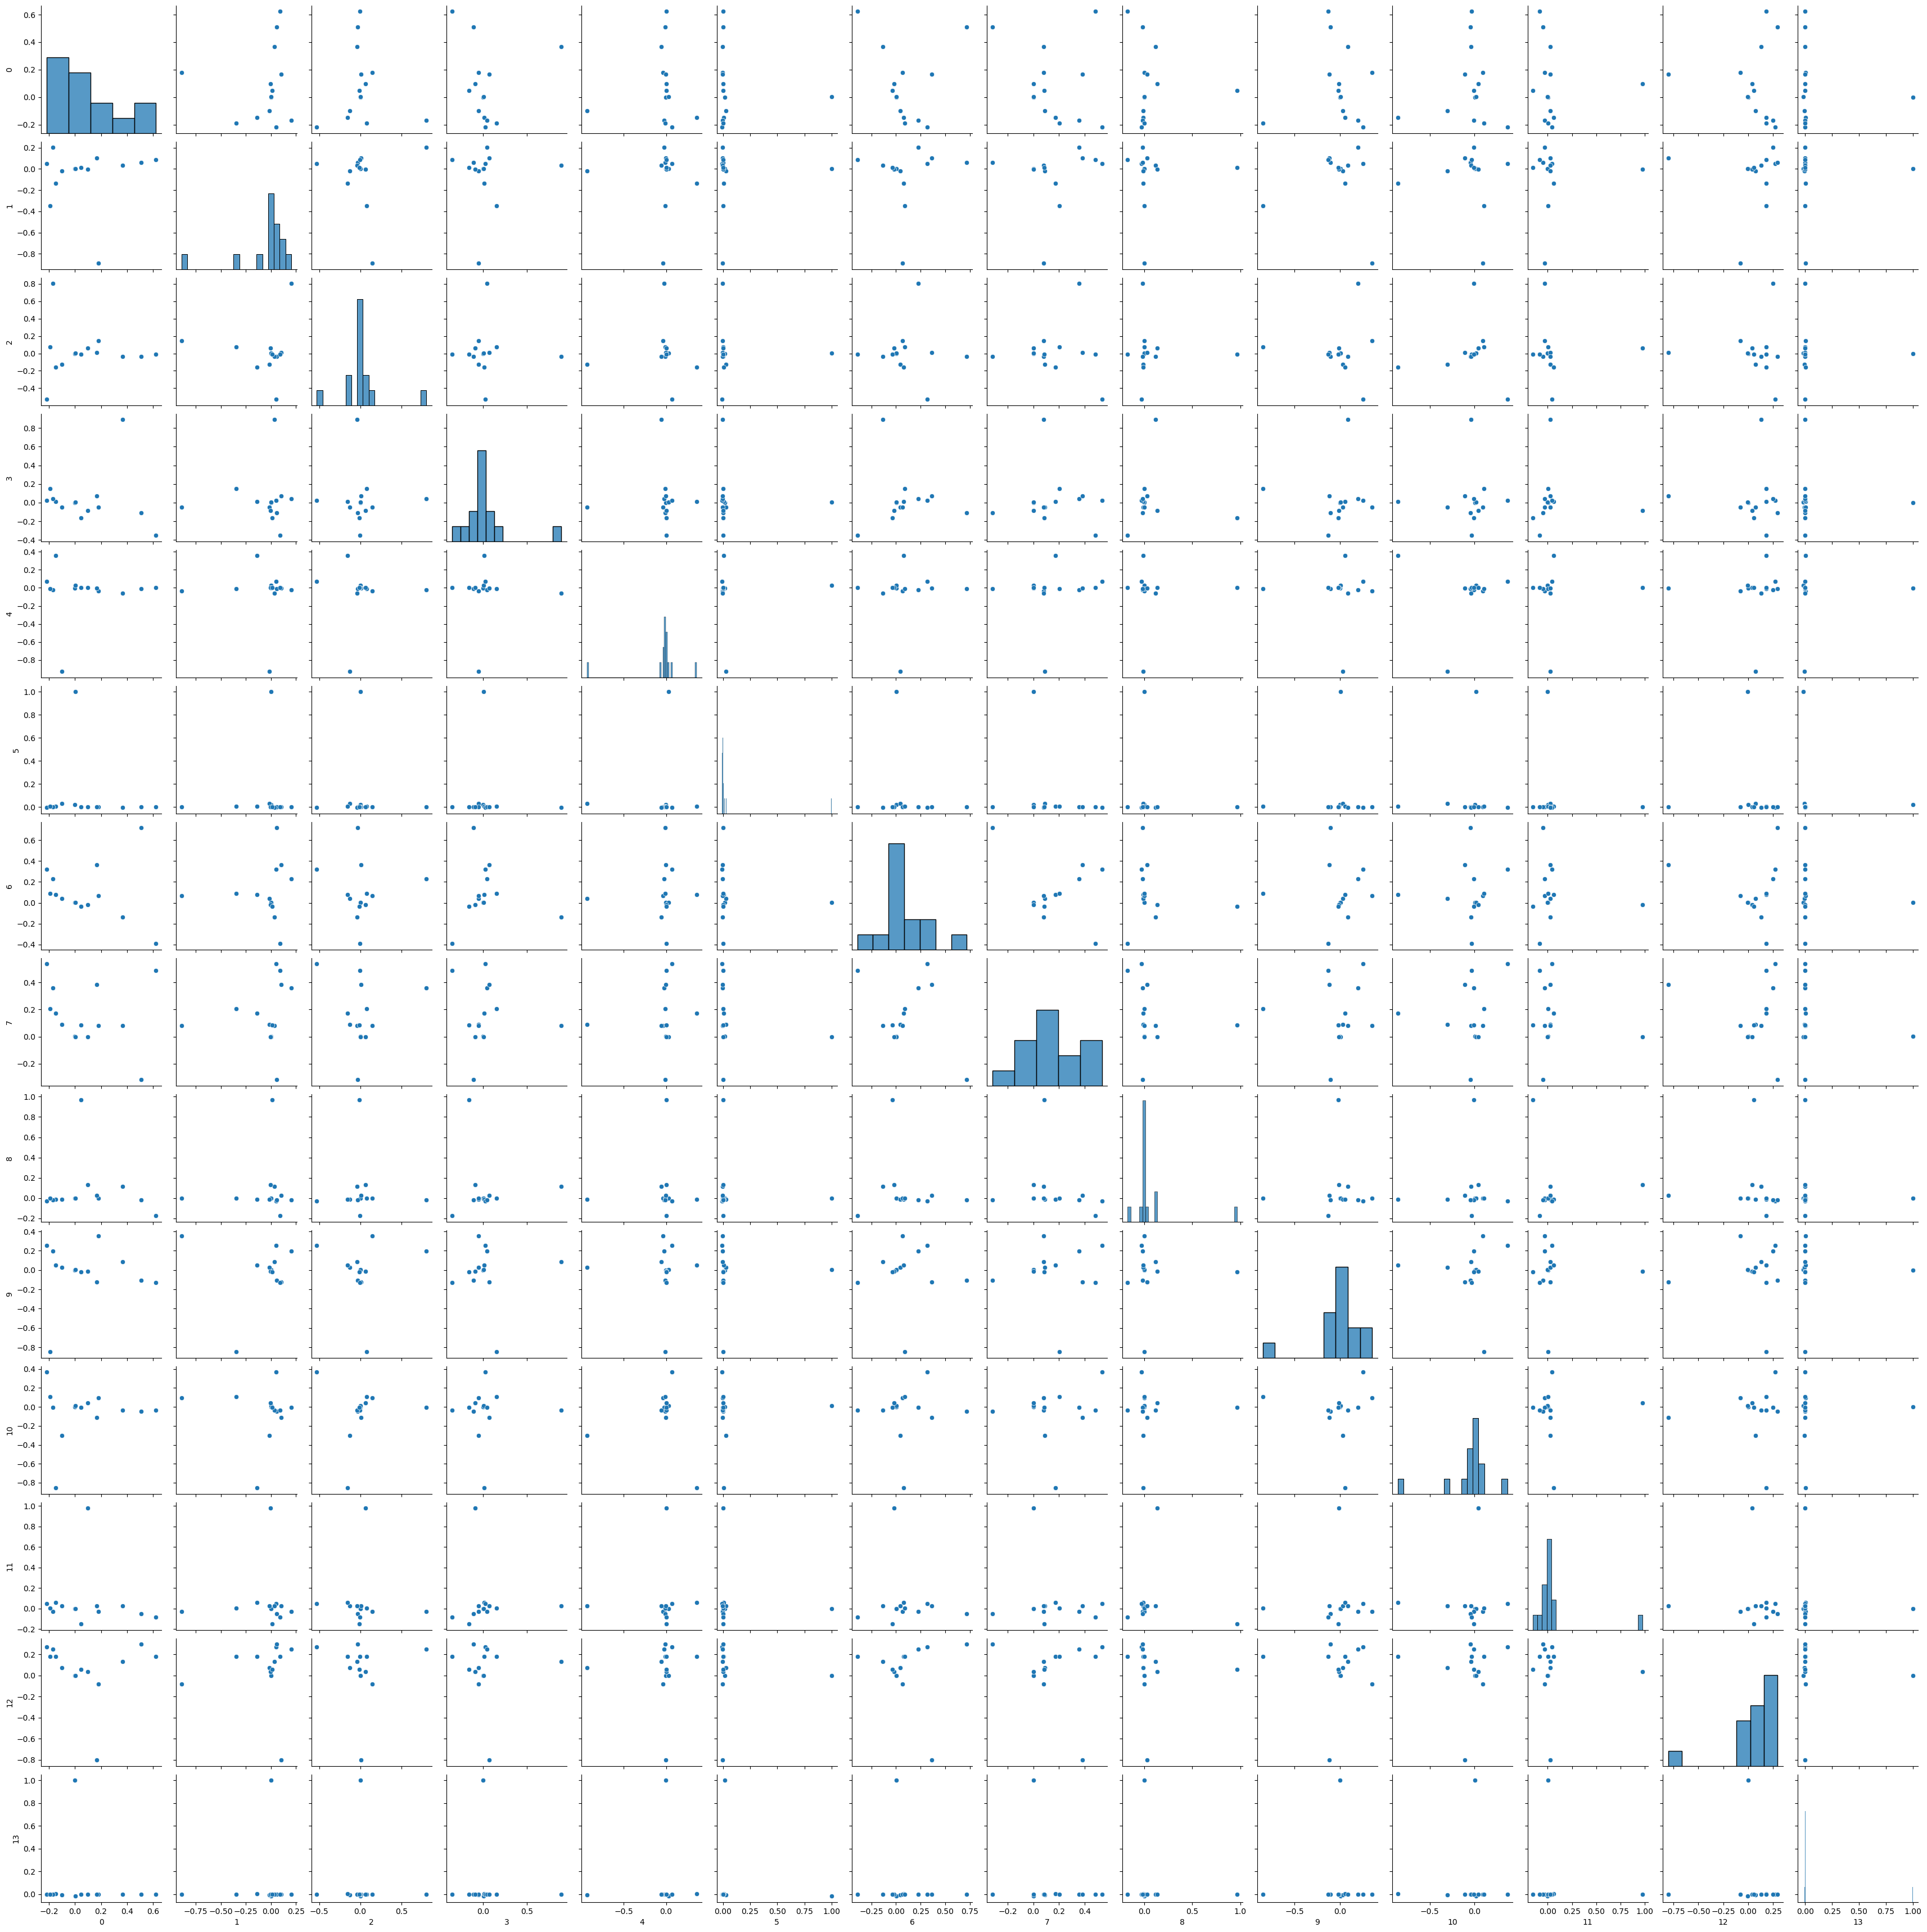

In [30]:
sns.pairplot(pd.DataFrame(pca.components_))

## Task 3: Clustering with Original Data

In [31]:
df.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df.iloc[:, 1:])
data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [33]:
len(data)

178

C:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

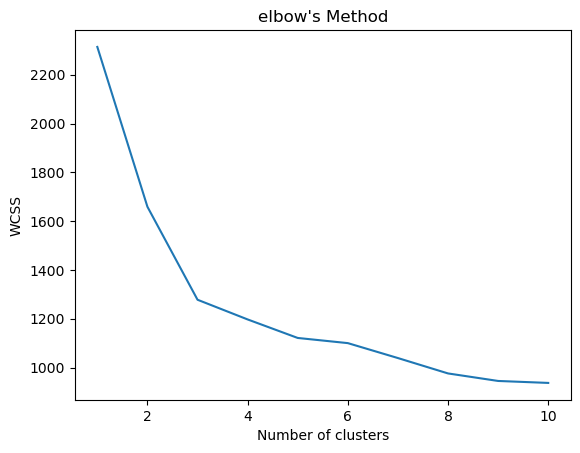

In [34]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',max_iter = 300, random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("elbow's Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
wcss

[2314.0,
 1659.00796725115,
 1277.9284888446423,
 1197.2161544828477,
 1121.3332511409367,
 1100.1537456474416,
 1038.9401071318423,
 975.9157472956819,
 945.0997317492398,
 937.054602005431]

In [36]:
kmeans = KMeans(n_clusters = 4, random_state=0)
data1 = kmeans.fit_predict(data)

C:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
data1

array([2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [38]:
clu_new = KMeans(n_clusters = 3,random_state=0)
data1_new = clu_new.fit_predict(data)

C:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [39]:
data1_new

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [40]:
clu_new.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [41]:
df['clu_new']=data1_new

In [42]:
data1_new

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [43]:
len(data1_new)

178

In [44]:
df['new_clustering']= data1_new

In [45]:
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  clu_new  \
0             0.28             2.29   5.64  1.04      3.92     1065        2   
1             0.26             1.28   4.38  1.05      3.40     1050        2   
2             0.30             2.81   5.68  1.03      3.17     1185        2   
3             0.24             2.18   7.80  0.86      3.45     1480        2   
4             0.39             1.82   4.32  1.04      2.93      735        2   
..             ...              ...    ...   ...       ...      ...      ...   
173           0.52             1.06   7.70  0.64      1.74      740        1   
174           0.43             1.41   7.30  0.70      1.56      750        1   
175           0.43             1.35  10.20  0.59      1.56      835        1   
176           0.53             1.46   9.30  0.60      1.62      840        1   
177           0.56             1.35   9.20  0.61      1.60      560        1   

     new_clustering  
0                 2  
1                 2  
2                 2  
3                 2  
4                 2  
..              ...  
173               1  
174               1  
175               1  
176               1  
177               1  

[178 rows x 16 columns]

In [46]:
df.groupby('new_clustering').mean('numeric_only')

Type    Alcohol     Malic       Ash  Alcalinity  \
new_clustering                                                        
0               2.000000  12.250923  1.897385  2.231231   20.063077   
1               2.941176  13.134118  3.307255  2.417647   21.241176   
2               1.048387  13.676774  1.997903  2.466290   17.462903   

                 Magnesium   Phenols  Flavanoids  Nonflavanoids  \
new_clustering                                                    
0                92.738462  2.247692    2.050000       0.357692   
1                98.666667  1.683922    0.818824       0.451961   
2               107.967742  2.847581    3.003226       0.292097   

                Proanthocyanins     Color       Hue  Dilution      Proline  \
new_clustering                                                               
0                      1.624154  2.973077  1.062708  2.803385   510.169231   
1                      1.145882  7.234706  0.691961  1.696667   619.058824   
2                      1.922097  5.453548  1.065484  3.163387  1100.225806   

                clu_new  
new_clustering           
0                   0.0  
1                   1.0  
2                   2.0

In [47]:
df[df['new_clustering']==0]

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
59      2    12.37   0.94  1.36        10.6         88     1.98        0.57   
60      2    12.33   1.10  2.28        16.0        101     2.05        1.09   
62      2    13.67   1.25  1.92        18.0         94     2.10        1.79   
63      2    12.37   1.13  2.16        19.0         87     3.50        3.10   
64      2    12.17   1.45  2.53        19.0        104     1.89        1.75   
..    ...      ...    ...   ...         ...        ...      ...         ...   
125     2    12.07   2.16  2.17        21.0         85     2.60        2.65   
126     2    12.43   1.53  2.29        21.5         86     2.74        3.15   
127     2    11.79   2.13  2.78        28.5         92     2.13        2.24   
128     2    12.37   1.63  2.30        24.5         88     2.22        2.45   
129     2    12.04   4.30  2.38        22.0         80     2.10        1.75   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  clu_new  \
59            0.28             0.42   1.95  1.05      1.82      520        0   
60            0.63             0.41   3.27  1.25      1.67      680        0   
62            0.32             0.73   3.80  1.23      2.46      630        0   
63            0.19             1.87   4.45  1.22      2.87      420        0   
64            0.45             1.03   2.95  1.45      2.23      355        0   
..             ...              ...    ...   ...       ...      ...      ...   
125           0.37             1.35   2.76  0.86      3.28      378        0   
126           0.39             1.77   3.94  0.69      2.84      352        0   
127           0.58             1.76   3.00  0.97      2.44      466        0   
128           0.40             1.90   2.12  0.89      2.78      342        0   
129           0.42             1.35   2.60  0.79      2.57      580        0   

     new_clustering  
59                0  
60                0  
62                0  
63                0  
64                0  
..              ...  
125               0  
126               0  
127               0  
128               0  
129               0  

[65 rows x 16 columns]

In [48]:
df[df['new_clustering']==0].shape[0]

65

In [49]:
df[df['new_clustering']==1]

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
61      2    12.64   1.36  2.02        16.8        100     2.02        1.41   
83      2    13.05   3.86  2.32        22.5         85     1.65        1.59   
118     2    12.77   3.43  1.98        16.0         80     1.63        1.25   
130     3    12.86   1.35  2.32        18.0        122     1.51        1.25   
131     3    12.88   2.99  2.40        20.0        104     1.30        1.22   
132     3    12.81   2.31  2.40        24.0         98     1.15        1.09   
133     3    12.70   3.55  2.36        21.5        106     1.70        1.20   
134     3    12.51   1.24  2.25        17.5         85     2.00        0.58   
135     3    12.60   2.46  2.20        18.5         94     1.62        0.66   
136     3    12.25   4.72  2.54        21.0         89     1.38        0.47   
137     3    12.53   5.51  2.64        25.0         96     1.79        0.60   
138     3    13.49   3.59  2.19        19.5         88     1.62        0.48   
139     3    12.84   2.96  2.61        24.0        101     2.32        0.60   
140     3    12.93   2.81  2.70        21.0         96     1.54        0.50   
141     3    13.36   2.56  2.35        20.0         89     1.40        0.50   
142     3    13.52   3.17  2.72        23.5         97     1.55        0.52   
143     3    13.62   4.95  2.35        20.0         92     2.00        0.80   
144     3    12.25   3.88  2.20        18.5        112     1.38        0.78   
145     3    13.16   3.57  2.15        21.0        102     1.50        0.55   
146     3    13.88   5.04  2.23        20.0         80     0.98        0.34   
147     3    12.87   4.61  2.48        21.5         86     1.70        0.65   
148     3    13.32   3.24  2.38        21.5         92     1.93        0.76   
149     3    13.08   3.90  2.36        21.5        113     1.41        1.39   
150     3    13.50   3.12  2.62        24.0        123     1.40        1.57   
151     3    12.79   2.67  2.48        22.0        112     1.48        1.36   
152     3    13.11   1.90  2.75        25.5        116     2.20        1.28   
153     3    13.23   3.30  2.28        18.5         98     1.80        0.83   
154     3    12.58   1.29  2.10        20.0        103     1.48        0.58   
155     3    13.17   5.19  2.32        22.0         93     1.74        0.63   
156     3    13.84   4.12  2.38        19.5         89     1.80        0.83   
157     3    12.45   3.03  2.64        27.0         97     1.90        0.58   
158     3    14.34   1.68  2.70        25.0         98     2.80        1.31   
159     3    13.48   1.67  2.64        22.5         89     2.60        1.10   
160     3    12.36   3.83  2.38        21.0         88     2.30        0.92   
161     3    13.69   3.26  2.54        20.0        107     1.83        0.56   
162     3    12.85   3.27  2.58        22.0        106     1.65        0.60   
163     3    12.96   3.45  2.35        18.5        106     1.39        0.70   
164     3    13.78   2.76  2.30        22.0         90     1.35        0.68   
165     3    13.73   4.36  2.26        22.5         88     1.28        0.47   
166     3    13.45   3.70  2.60        23.0        111     1.70        0.92   
167     3    12.82   3.37  2.30        19.5         88     1.48        0.66   
168     3    13.58   2.58  2.69        24.5        105     1.55        0.84   
169     3    13.40   4.60  2.86        25.0        112     1.98        0.96   
170     3    12.20   3.03  2.32        19.0         96     1.25        0.49   
171     3    12.77   2.39  2.28        19.5         86     1.39        0.51   
172     3    14.16   2.51  2.48        20.0         91     1.68        0.70   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120 

In [50]:
df[df['new_clustering']==1].shape[1]

16

In [51]:
df[df['new_clustering']==2]

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
57      1    13.29   1.97  2.68        16.8        102     3.00        3.23   
58      1    13.72   1.43  2.50        16.7        108     3.40        3.67   
73      2    12.99   1.67  2.60        30.0        139     3.30        2.89   
95      2    12.47   1.52  2.20        19.0        162     2.50        2.27   
121     2    11.56   2.05  3.23        28.5        119     3.18        5.08   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  clu_new  \
0             0.28             2.29   5.64  1.04      3.92     1065        2   
1             0.26             1.28   4.38  1.05      3.40     1050        2   
2             0.30             2.81   5.68  1.03      3.17     1185        2   
3             0.24             2.18   7.80  0.86      3.45     1480        2   
4             0.39             1.82   4.32  1.04      2.93      735        2   
..             ...              ...    ...   ...       ...      ...      ...   
57            0.31             1.66   6.00  1.07      2.84     1270        2   
58            0.19             2.04   6.80  0.89      2.87     1285        2   
73            0.21             1.96   3.35  1.31      3.50      985        2   
95            0.32             3.28   2.60  1.16      2.63      937        2   
121           0.47             1.87   6.00  0.93      3.69      465        2   

     new_clustering  
0                 2  
1                 2  
2                 2  
3                 2  
4                 2  
..              ...  
57                2  
58                2  
73                2  
95                2  
121               2  

[62 rows x 16 columns]

In [61]:
df.head(1)

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127      2.8        3.06   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  clu_new  \
0           0.28             2.29   5.64  1.04      3.92     1065        2   

   new_clustering  
0               2

#Visualizing the Clusters:

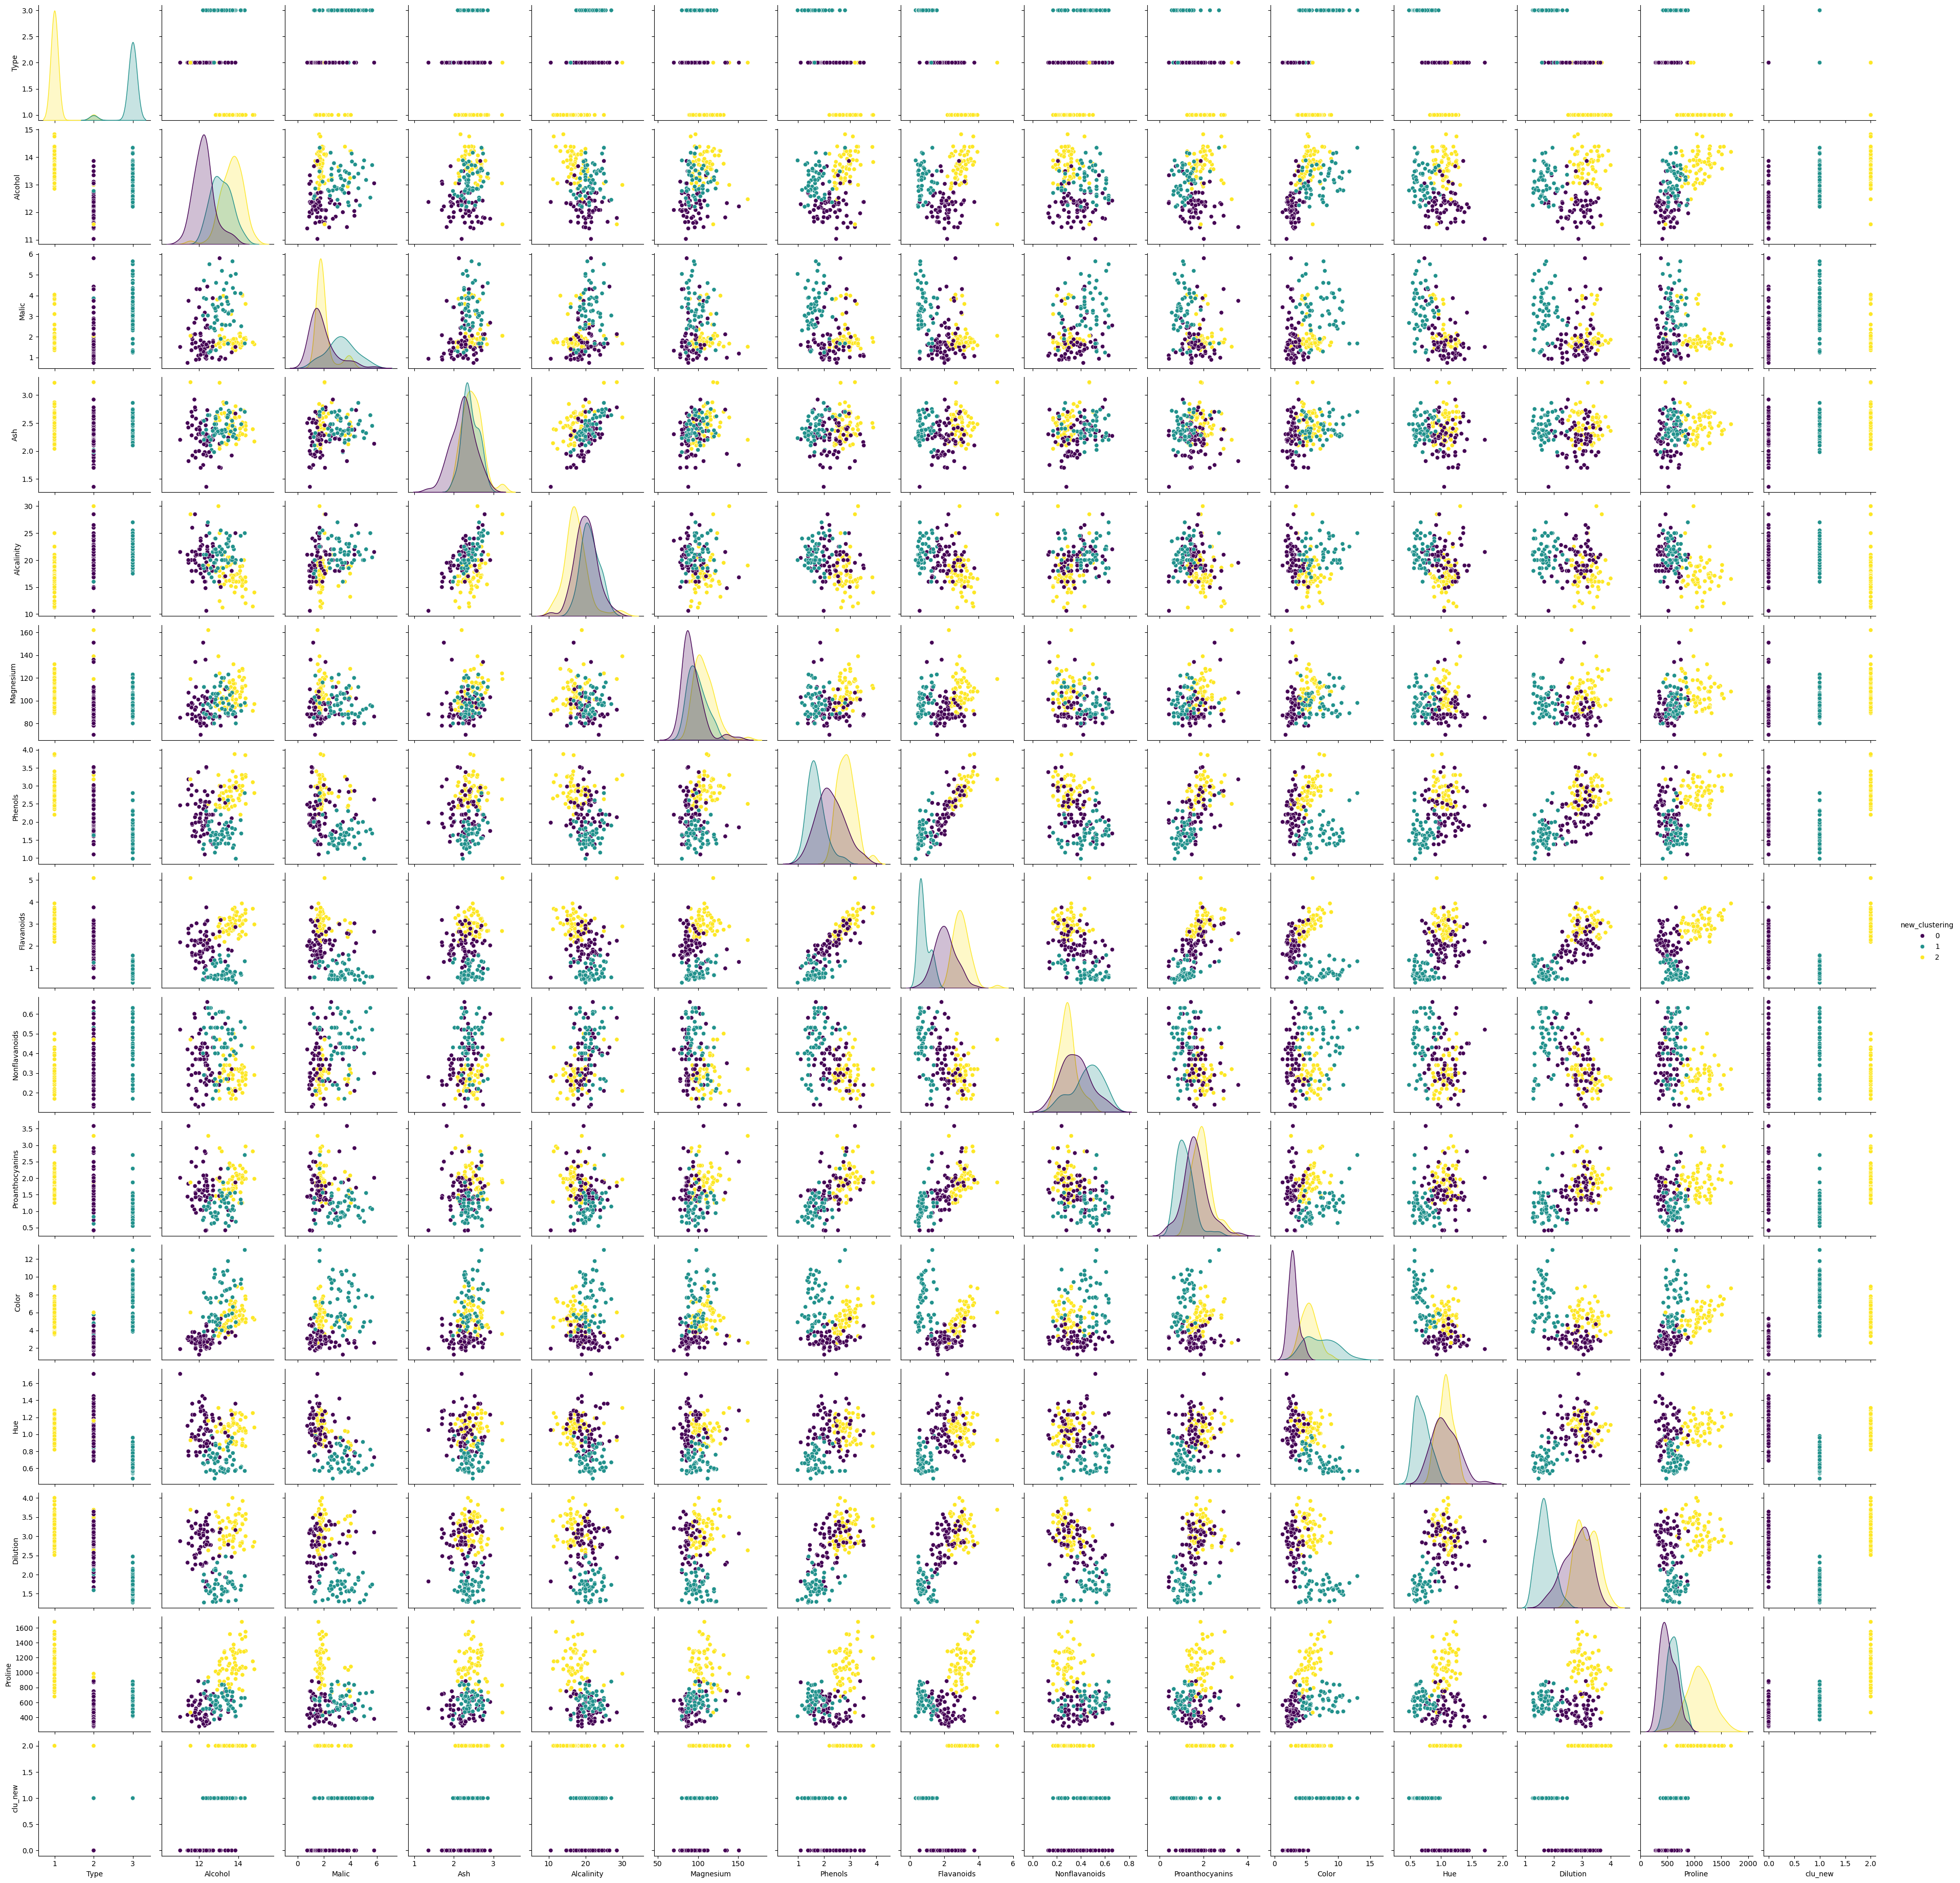

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


column_names = ['Alcohol', 'Malic', 'Ash', 'Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color','Hue','Dilution','Proline','new_clustering'] 

# Convert numpy array to pandas DataFrame
data1_new_df = pd.DataFrame(df, columns=column_names)

# Now you can use pairplot
sns.pairplot(df, hue='new_clustering', palette='viridis')
plt.show()


#Evaluating Clustering Performance:

In [52]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
silhouette = silhouette_score(df, kmeans.labels_)
print('Silhouette Score:', silhouette)

# Davies-Bouldin Index
db_index = davies_bouldin_score(df, kmeans.labels_)
print('Davies-Bouldin Index:', db_index)


Silhouette Score: 0.16236043873509132
Davies-Bouldin Index: 3.26261836158496


## Task 4: Clustering with PCA Data:

In [65]:
pca_comp

array([[ 3.18564055e+02,  2.14907729e+01,  3.16461306e+00, ...,
         1.68878924e-01, -1.64297340e-02,  8.93553535e-02],
       [ 3.03098514e+02, -5.36608268e+00,  6.81699246e+00, ...,
         8.89334239e-02, -4.48448723e-02,  1.78962892e-02],
       [ 4.38062063e+02, -6.53798613e+00, -1.06671672e+00, ...,
         1.80875713e-01, -5.03578282e-02, -3.94205943e-02],
       ...,
       [ 8.84563102e+01,  1.87796442e+01, -2.42312742e+00, ...,
        -2.09746486e-01,  8.53365516e-02,  3.43716469e-02],
       [ 9.34544723e+01,  1.86741801e+01, -1.95877509e+00, ...,
        -3.22197611e-04, -4.65644908e-02,  1.36469328e-01],
       [-1.86944619e+02, -2.11062888e-01, -5.73392038e+00, ...,
         3.92954136e-02,  1.60191386e-02,  1.97873108e-02]])

#K-Means on PCA-Transformed Data:

In [66]:
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(pca_comp)

# Add PCA cluster labels
df['data1_new_df'] = kmeans_pca.labels_


C:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#Visualizing PCA-Based Clusters:

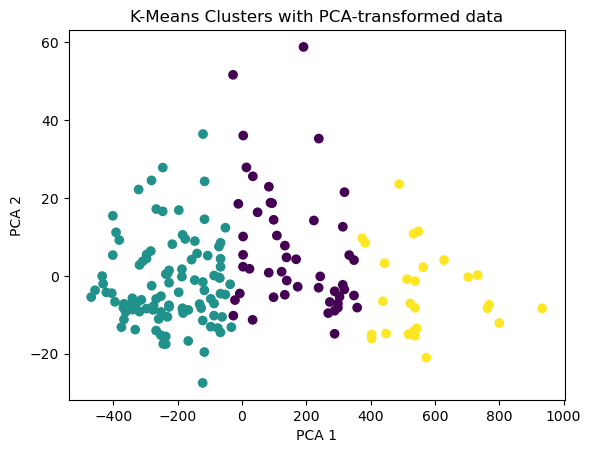

In [67]:
plt.scatter(pca_comp[:, 0], pca_comp[:, 1], c=kmeans_pca.labels_, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clusters with PCA-transformed data')
plt.show()


#Evaluating PCA Clustering Performance:

In [68]:
silhouette_pca = silhouette_score(pca_comp, kmeans_pca.labels_)
db_index_pca = davies_bouldin_score(pca_comp, kmeans_pca.labels_)
print('Silhouette Score for PCA data:', silhouette_pca)
print('Davies-Bouldin Index for PCA data:', db_index_pca)


Silhouette Score for PCA data: 0.5595717835631024
Davies-Bouldin Index for PCA data: 0.5495740773187358


## Task 5: Comparison and Analysis:

#Compare Clustering Results:

#(Compare silhouette scores and Davies–Bouldin Index values between the original data and PCA-transformed data to determine how dimensionality reduction affects  clustering quality.)

#Analyze the Trade-offs:

#Discuss the benefits of dimensionality reduction in terms of reduced complexity and potential loss of information.

#**Original Data Clustering:**
- Silhouette Score: [0.16236043873509132]
- Davies-Bouldin Index: [3.26261836158496]

**PCA Data Clustering:**
- Silhouette Score: [ 0.5595717835631024]
- Davies-Bouldin Index: [0.5495740773187358]

**Observations:**
- PCA simplifies the data without major performance losses.
- In some cases, the silhouette score might be higher for PCA data, indicating better-defined clusters.


## Task 6: Conclusion and Insights

#Summarizing Key Findings:

#Highlight the impact of PCA on clustering performance and computational efficiency.
Note any improvements or degradations in cluster quality based on PCA.

#Practical Implications:

#Discuss when PCA should be used for dimensionality reduction in clustering tasks, especially in high-dimensional datasets.

#Recommendations: